In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
breast = pd.read_csv(r"C:\Users\HP\Favorites\Downloads\breast-cancer.csv")
breast.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
breast.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# Encode target (M = 1, B = 0)
breast['diagnosis'] = LabelEncoder().fit_transform(breast['diagnosis'])

In [5]:
X = breast[['radius_mean', 'texture_mean']].values
y = breast['diagnosis'].values

In [6]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=42)

In [8]:
# Define a function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.title(title)
    plt.show()


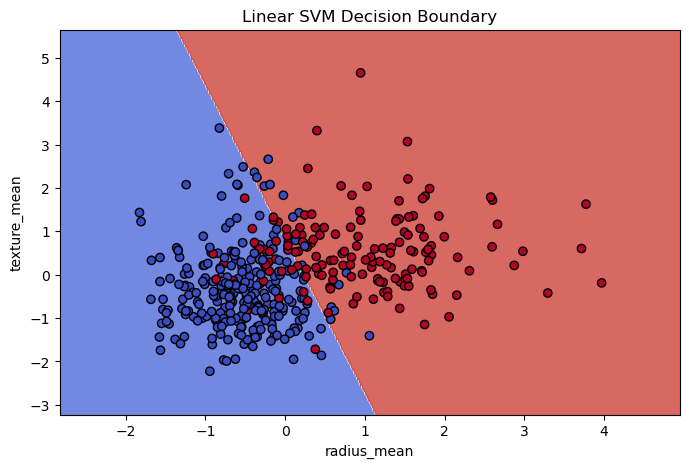

In [9]:
# Linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, svm_linear, "Linear SVM Decision Boundary")


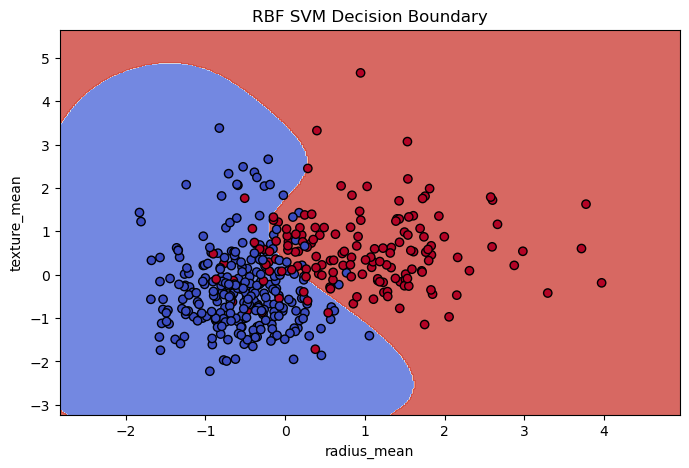

In [10]:
# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, svm_rbf, "RBF SVM Decision Boundary")


In [11]:
# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]})

In [12]:
# Best model evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Best Hyperparameters:", grid.best_params_)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        89
           1       0.90      0.83      0.87        54

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.89       143
weighted avg       0.90      0.90      0.90       143

Confusion Matrix:
 [[84  5]
 [ 9 45]]
Best Hyperparameters: {'C': 10, 'gamma': 0.1}


In [13]:
cv_score = cross_val_score(best_model, X, y, cv=5).mean()
print("Cross-Validation Score:", round(cv_score, 4))

Cross-Validation Score: 0.8875
